In [1]:
import numpy as np
from numpy import *
from scipy.optimize import curve_fit

#plotting
import matplotlib.pyplot as plt
import matplotlib

#matlab import
import scipy.io
from scipy.io import savemat
from scipy.optimize import minimize
from scipy.fft import fft, ifft, fftshift, ifftshift

#file_store
import os

#time
import time
from datetime import datetime, timedelta


from TWPA_scearch_best_gain import *
def linear_func(x, a, b):
    return a * x + b

def linear_fit(x, y):
    popt, pcov = curve_fit(linear_func, x, y)
    a = popt[0]
    b = popt[1]
    a_err = np.sqrt(pcov[0, 0])
    b_err = np.sqrt(pcov[1, 1])
    return a, b, a_err, b_err

from ctypes import *
%matplotlib inline

Global_data_adress = r"C:\Users\Demag\PycharmProjects\ColdMeasurements\DeMag\DATA"
exp_name = 'TWPA_noise_9'
adress = Global_data_adress+'\\'+exp_name
if not os.path.exists(adress):
  os.mkdir(adress)
  print("Folder %s created!" % adress)
else:
  print("Folder %s already exists" % adress)


# Stable temperature since 02.06.2025

Folder C:\Users\Demag\PycharmProjects\ColdMeasurements\DeMag\DATA\TWPA_noise_9 already exists


In [14]:
initial_folder = r'C:\Users\Demag\PycharmProjects\ColdMeasurements\DeMag\DATA\TWPA_noise_9\Y_factor'
file = "Y_factor_t_13_mK_2025-07-01-15-04-52.mat" 
mat = sio.loadmat(initial_folder+"\\"+file)
mat.keys()

dict_keys(['__header__', '__version__', '__globals__', 'dc_bbp', 'pp_bbp', 'pf_bbp', 'temp', 'band_noise_bg_KHz', 'band_noise_gain_KHz', 'cent_freq_sa', 'span_sa_noise_GHz', 'span_sa_gain_GHz', 'power_sweep', 'freq_sa_gain', 'spectra_for_gain', 'freq_sa_noise', 'spectra_no_signal', 'low_noise_pump_freq_IM1_arr', 'low_noise_pump_freq_IM2_arr', 'IM_sa_span_GHz', 'IM_sa_nop', 'spectra_for_IM'])

In [255]:
initial_folder = r'C:\Users\Demag\PycharmProjects\ColdMeasurements\DeMag\DATA\TWPA_noise_9\Y_factor'
file = "Y_factor_t_200_mK_2025-07-02-16-35-15.mat" 
mat200 = sio.loadmat(initial_folder+"\\"+file)
mat200.keys()

dict_keys(['__header__', '__version__', '__globals__', 'dc_bbp', 'pp_bbp', 'pf_bbp', 'temp', 'band_noise_bg_KHz', 'band_noise_gain_KHz', 'cent_freq_sa', 'span_sa_noise_GHz', 'span_sa_gain_GHz', 'power_sweep', 'freq_sa_gain', 'spectra_for_gain', 'freq_sa_noise', 'spectra_no_signal', 'low_noise_pump_freq_IM1_arr', 'low_noise_pump_freq_IM2_arr', 'IM_sa_span_GHz', 'IM_sa_nop', 'spectra_for_IM'])

In [265]:
spectra_no_signal = mat['spectra_no_signal']
spectra_for_gain = mat['spectra_for_gain']
dc_bbp = mat['dc_bbp'][0]
freq_sa_noise = mat['freq_sa_noise'][0]

print("spectra_no_signal", spectra_no_signal.shape)

spectra_no_signal200 = mat200['spectra_no_signal']
spectra_for_gain200 = mat200['spectra_for_gain']

spectra_for_IM = mat200['spectra_for_IM']
IM_sa_span_GHz = mat200['IM_sa_span_GHz'][0]
IM_sa_nop = mat200['IM_sa_nop'][0]

dc_bbp200 = mat200['dc_bbp'][0]

spectra_no_signal (52, 2, 100001)


TypeError: only integer scalar arrays can be converted to a scalar index

In [270]:
pf_bbp.shape

(45,)

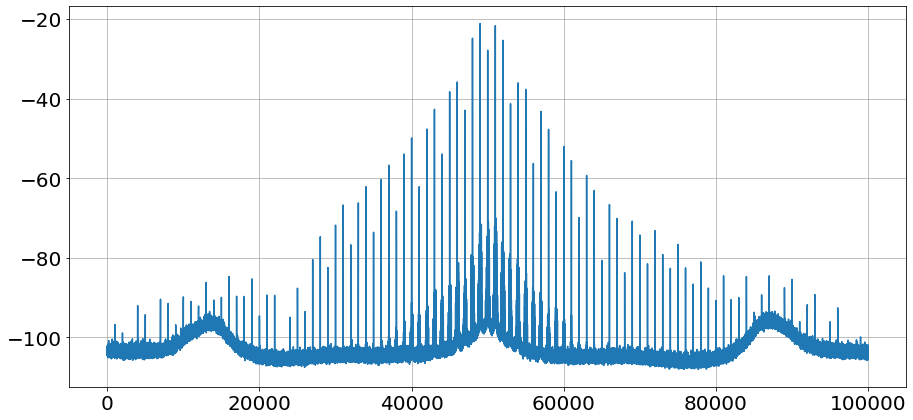

In [273]:
fig, ax = plt.subplots(figsize = (15, 7))
ax.grid()
# pf_bbp = mat200['pf_bbp'][30]
# freq200 = np.linspace(pf_bbp-IM_sa_span_GHz*0.5, pf_bbp+IM_sa_span_GHz*0.5, IM_sa_nop)
ax.plot(spectra_for_IM[20, 4])

In [29]:
gain_13 = np.array([])
for i in range(len(spectra_for_gain)):
    gain_13 = np.append(gain_13, np.round(max(spectra_for_gain[i, 1])-max(spectra_for_gain[i, 0]),2))

    
gain_200 = np.array([])  
for i in range(len(spectra_for_gain200)):
    gain_200 = np.append(gain_200, np.round(max(spectra_for_gain200[i, 1])-max(spectra_for_gain200[i, 0]),2))


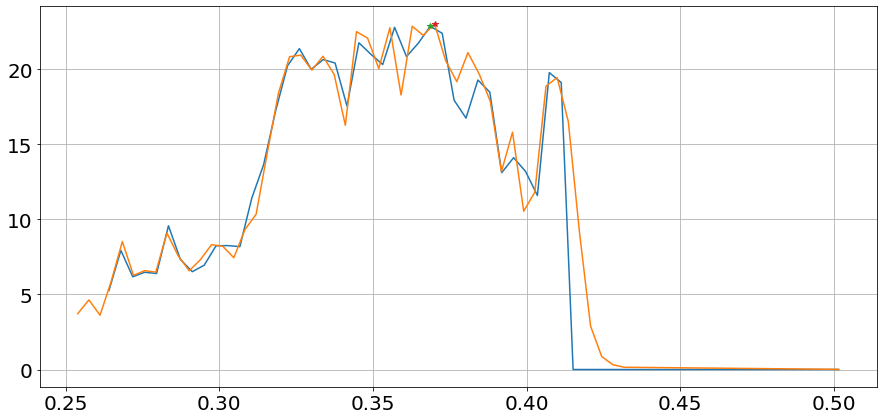

In [118]:
fig, ax = plt.subplots(figsize = (15, 7))
ax.grid()
ax.plot(dc_bbp200/3.937562271670541, gain_200)
ax.plot(dc_bbp/3.937562271670541, gain_13)
ax.plot(dc_bbp200[27:28]/3.937562271670541, gain_200[27:28], '*')
ax.plot(dc_bbp[32:33]/3.937562271670541, gain_13[32:33], '*')

In [45]:
gain_200[18], gain_13[22]

(20.66, 20.88)

In [122]:
idx_200 = 27
idx_13 = 32

In [123]:
import numpy as np

def block_avg(x, y, window_size=10):
    block_size = window_size
    x = np.asarray(x)
    y = np.asarray(y)

    if len(x) != len(y):
        raise ValueError("x and y must have the same length.")
    if block_size <= 0:
        raise ValueError("block_size must be positive.")

    # Trim to make divisible by block_size
    n_blocks = len(y) // block_size
    x = x[:n_blocks * block_size]
    y = y[:n_blocks * block_size]

    # Reshape and average
    x_blocks = x.reshape(n_blocks, block_size)
    y_blocks = y.reshape(n_blocks, block_size)

    x_avg = x_blocks.mean(axis=1)
    y_avg = y_blocks.mean(axis=1)

    return x_avg, y_avg


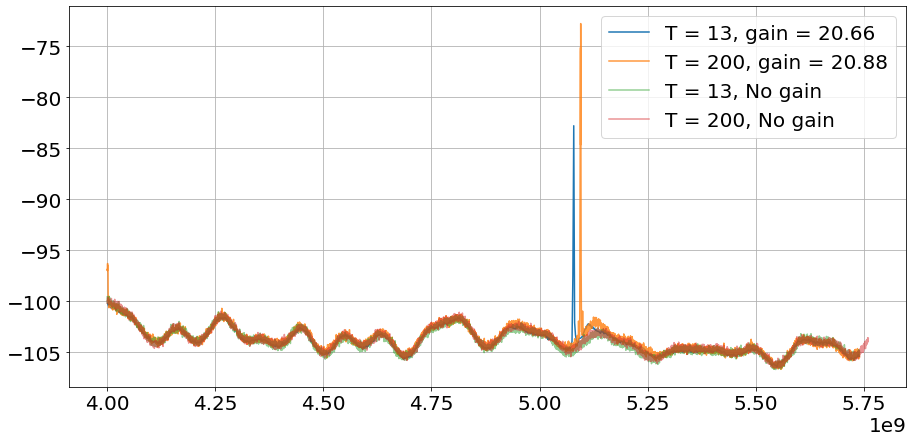

In [124]:
font = {'size'   : 20}
matplotlib.rc('font', **font)
fig, ax = plt.subplots(figsize = (15, 7))
ax.grid()
a,b = block_avg(freq_sa_noise[:-13000], spectra_no_signal[idx_13, 1, :-13000], window_size=100)
ax.plot(a, b, alpha = 1, label = 'T = 13, gain = 20.66')
a,b = block_avg(freq_sa_noise[:-13000], spectra_no_signal200[idx_200, 1, :-13000], window_size=10)
ax.plot(a, b, alpha = 0.8, label = 'T = 200, gain = 20.88')

a,b = block_avg(freq_sa_noise[:-13000], spectra_no_signal[idx_13, 0, :-13000], window_size=10)
ax.plot(a,b, alpha = 0.5, label = 'T = 13, No gain')
a,b = block_avg(freq_sa_noise[:-12000], spectra_no_signal200[idx_200, 0, :-12000], window_size=10)
ax.plot(a,b, alpha = 0.5, label = 'T = 200, No gain')
ax.legend()

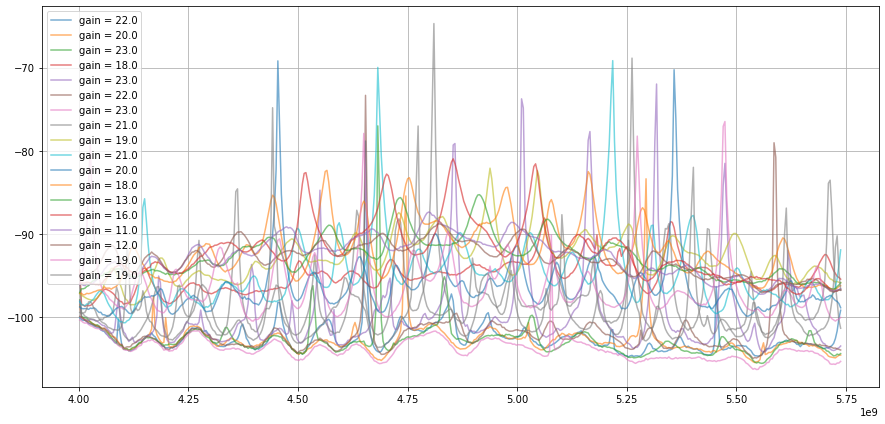

In [136]:
font = {'size'   : 10}
matplotlib.rc('font', **font)
fig, ax = plt.subplots(figsize = (15, 7))
ax.grid()

for i in range(len(gain_13)-34):
    a,b = block_avg(freq_sa_noise[:-13000], spectra_no_signal[i+26, 1, :-13000], window_size=200)
    ax.plot(a,b, alpha = 0.6, label = 'gain = {}'.format(np.round(gain_13[i+26])))

ax.legend()

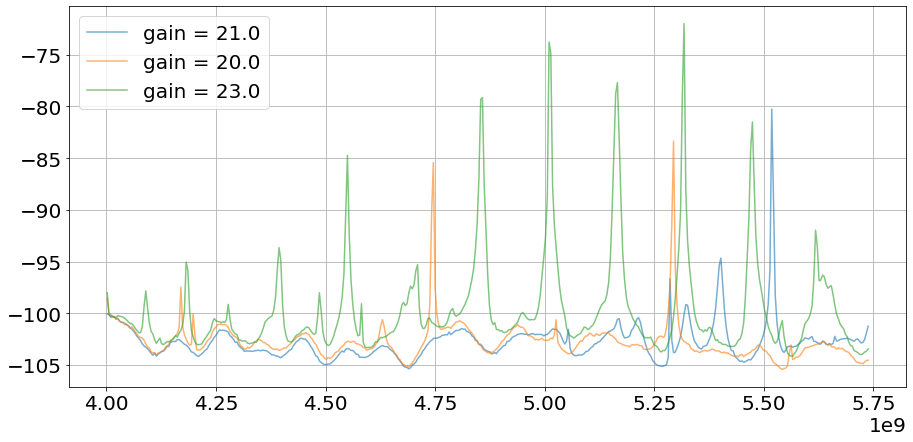

In [254]:
fig, ax = plt.subplots(figsize = (15, 7))
ax.grid()

for i in [19, 27, 30]:
    a,b = block_avg(freq_sa_noise[:-13000], spectra_no_signal[i, 1, :-13000], window_size=200)
    ax.plot(a,b, alpha = 0.6, label = 'gain = {}'.format(np.round(gain_13[i])))

ax.legend()

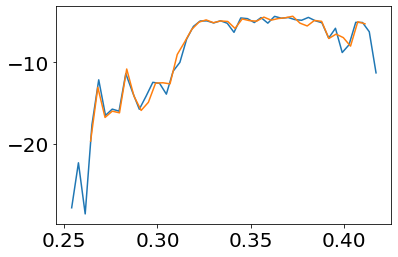

In [245]:
bg = np.array([])
bg200 = np.array([])
for i in range(len(dc_bbp)):
    a,b = block_avg(freq_sa_noise[:-13000], spectra_no_signal[i, 1, :-13000], window_size=200)
    bg = np.append(bg, np.mean(b))
    
for i in range(len(dc_bbp200)):
    a,b = block_avg(freq_sa_noise[:-13000], spectra_no_signal200[i, 1, :-13000], window_size=200)
    bg200 = np.append(bg200, np.mean(b))
    
plt.plot(dc_bbp[:-6]/3.937562271670541, bg[:-6]/gain_13[:-6])
plt.plot(dc_bbp200[:-4]/3.937562271670541, bg200[:-4]/gain_200[:-4])

# power_sweep

In [235]:
initial_folder = r'C:\Users\Demag\PycharmProjects\ColdMeasurements\DeMag\DATA\TWPA_noise_9\Y_factor'
file = "Power_sweep_no_IM_just_pump_12_mK_2025-07-03-20-31-56.mat" 
matpow = sio.loadmat(initial_folder+"\\"+file)
matpow.keys()

dict_keys(['__header__', '__version__', '__globals__', 'dc_low_noise', 'freq_low_noise', 'power_sweep', 'band_noise_gain_KHz', 'freq_sa_noise', 'temp', 'spectra'])

In [236]:
spectra = matpow['spectra'][:, :-43000]
print(spectra.shape)
power_sweep = matpow['power_sweep'][0][:]
freq_sa = matpow['freq_sa_noise'][0, :-43000]

(21, 57001)


In [237]:
a, b = block_avg(freq_sa, spectra[i], window_size=200)
spectra1 = np.ones((len(power_sweep), len(a)))*(-100)

for i in range(len(power_sweep)):
    a, b = block_avg(freq_sa, spectra[i], window_size=200)
    spectra1[i] = b

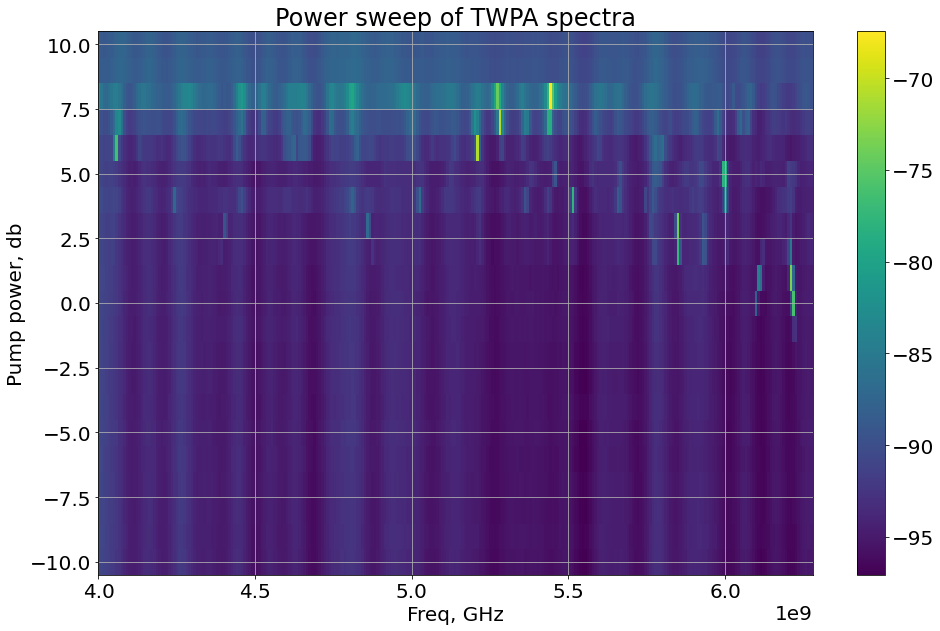

In [238]:
font = {'size'   : 20}
matplotlib.rc('font', **font)
fig2, ax = plt.subplots(1, 1, figsize=(16,10), sharex = True, sharey = True)

c1 = ax.pcolor(a, power_sweep, spectra1, cmap='viridis')
ax.set_title(r'Power sweep of TWPA spectra')
ax.set_xlabel(r'Freq, GHz')
ax.set_ylabel(r'Pump power, db')
ax.grid(True)
fig.colorbar(c1, ax=ax, orientation='vertical')

plt.show()